<a href="https://colab.research.google.com/github/ApoorvaGrover/ApoorvaGrover/blob/main/Houseprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving housing.data to housing.data
{'housing.data': b' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00\n 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60\n 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70\n 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40\n 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20\n 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70 394.12   5.21  28.70\n 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20 395.60  12.43  22.90\n 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20 396.90  19.15  27.10\n 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20 386.63  29.93  16.50\n 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  

# New section

# New section

In [ ]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving housing.names to housing.names
{'housing.names': b'1. Title: Boston Housing Data\n\n2. Sources:\n   (a) Origin:  This dataset was taken from the StatLib library which is\n                maintained at Carnegie Mellon University.\n   (b) Creator:  Harrison, D. and Rubinfeld, D.L. \'Hedonic prices and the \n                 demand for clean air\', J. Environ. Economics & Management,\n                 vol.5, 81-102, 1978.\n   (c) Date: July 7, 1993\n\n3. Past Usage:\n   -   Used in Belsley, Kuh & Welsch, \'Regression diagnostics ...\', Wiley, \n       1980.   N.B. Various transformations are used in the table on\n       pages 244-261.\n    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.\n       In Proceedings on the Tenth International Conference of Machine \n       Learning, 236-243, University of Massachusetts, Amherst. Morgan\n       Kaufmann.\n\n4. Relevant Information:\n\n   Concerns housing values in suburbs of Boston.\n\n5. Number of Instances: 506\n

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define column names based on housing.names file
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Load the dataset with space separator and specified column names
dataset = pd.read_csv("housing.data", sep='\s+', names=column_names)
print(dataset.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
dataset.shape

(505, 1)

data preprocessing

In [ ]:
obj=(dataset.dtypes=="object")
object_cols=list(obj[obj].index)
int_=(dataset.dtypes=="int")
num_cols=list(int_[int_].index)
print("integer variables :",len(num_cols))
fl=(dataset.dtypes=="float")
fl_cols=list(fl[fl].index)
print("float variables:",len(fl_cols))

integer variables : 0
float variables: 0


exploratory data analysis

In [ ]:
numerical_dataset=dataset.select_dtypes(include=["number"])
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: >

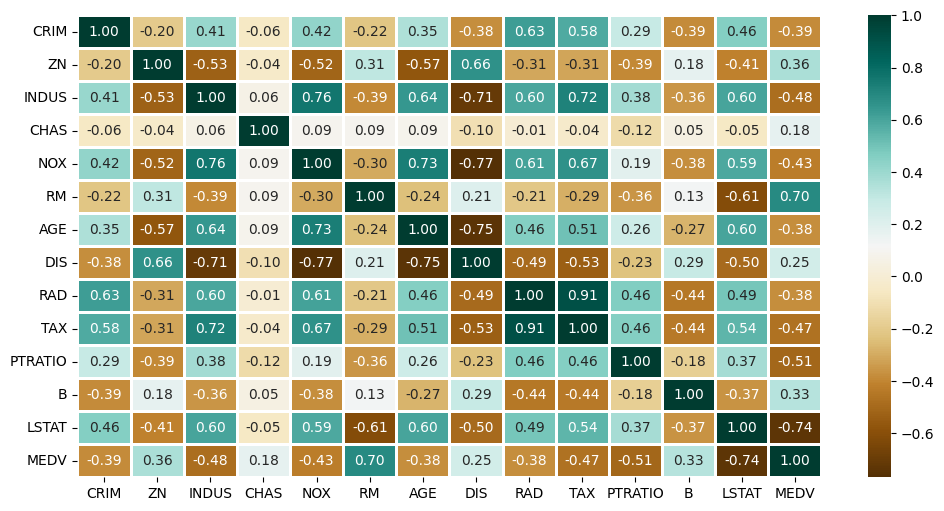

In [ ]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [ ]:
new_dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
[]
No. of. categorical features:  0


data training and testing

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = dataset.drop(['MEDV'], axis=1)
Y = dataset['MEDV']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

As we have to train the model to determine the continuous values, so we will be using these regression models.

SVM-Support Vector Machine
Random Forest Regressor
Linear Regressor

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.2295724503858608


is a supervised machine learning algorithm primarily used for classification tasks though it can also be used for regression. It works by finding the hyperplane that best divides a dataset into classes. The goal is to maximize the margin between the data points and the hyperplane.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RFR=RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train,Y_train)
Y_pred=model_RFR.predict(X_valid)
print(mean_absolute_percentage_error(Y_valid,Y_pred))

0.12383537982354606


In [ ]:
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()
model_LR.fit(X_train,Y_train)
Y_pred=model_LR.predict(X_valid)
print(mean_absolute_percentage_error(Y_valid,Y_pred))

0.1835628529390647


for better results bagging and boosting can also be done